## The problem statement for the given project is as follows:

    
    BigMart, a leading retail chain, aims to understand the key factors that influence the sales of its products across different stores. The company has collected comprehensive sales data for 1559 products across 10 stores located in various cities. Based on certain characteristics of the products and stores, the objective is to forecast each product's sales at a specific store.However, because of reporting technological hiccups, the obtained data contains missing numbers. As a result, it's important to handle these missing values correctly.



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Loading Packages

In [2]:
#Impoting Liabrariesabs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error

### Loading Dataset

In [3]:
# Load the dataset
train_data = pd.read_csv('/content/drive/MyDrive/Internship/Train.csv')
test_data = pd.read_csv('/content/drive/MyDrive/Internship/Test.csv')

### Data Structure

In [4]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [6]:
# Checking the data types
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [8]:
#Check the descretive analysis
train_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [9]:
train_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [10]:
data = train_data
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


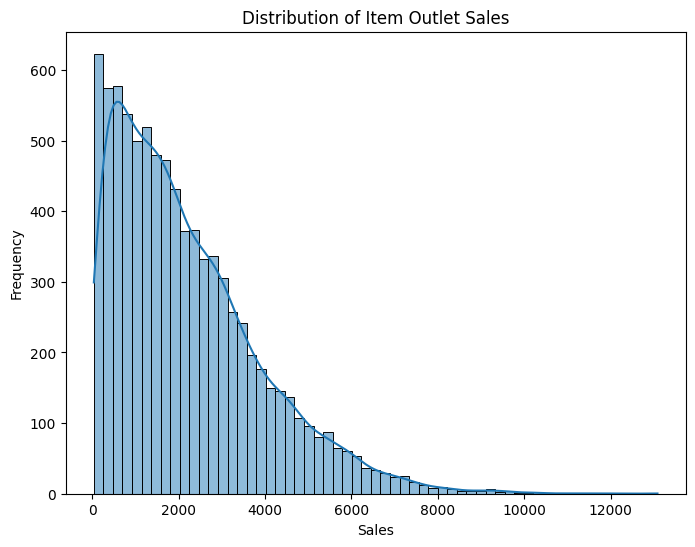

In [11]:
# Analyze the target variable (Item_Outlet_Sales) distribution
plt.figure(figsize=(8, 6))
sns.histplot(data['Item_Outlet_Sales'], kde=True)
plt.title('Distribution of Item Outlet Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

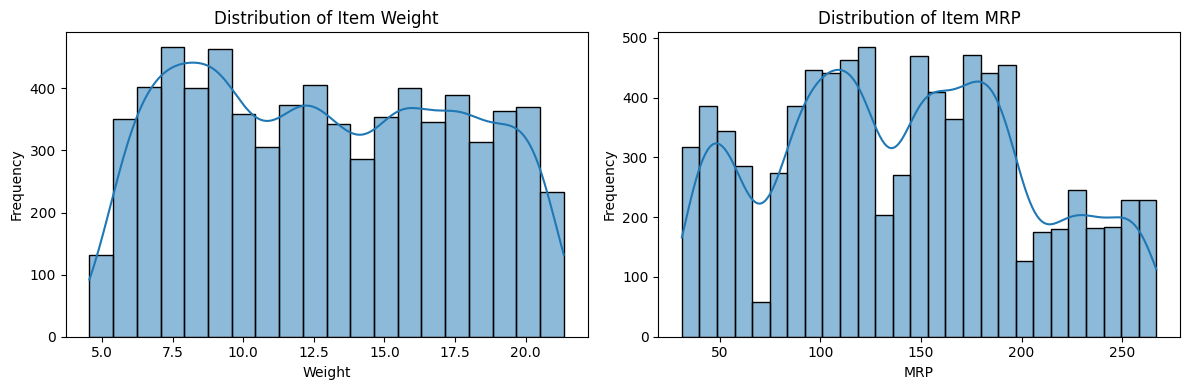

In [12]:
# Analyze the distributions of numerical variables (Item_Weight, Item_MRP)
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.histplot(data['Item_Weight'].dropna(), kde=True)
plt.title('Distribution of Item Weight')
plt.xlabel('Weight')
plt.ylabel('Frequency')


plt.subplot(1, 2, 2)
sns.histplot(data['Item_MRP'], kde=True)
plt.title('Distribution of Item MRP')
plt.xlabel('MRP')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

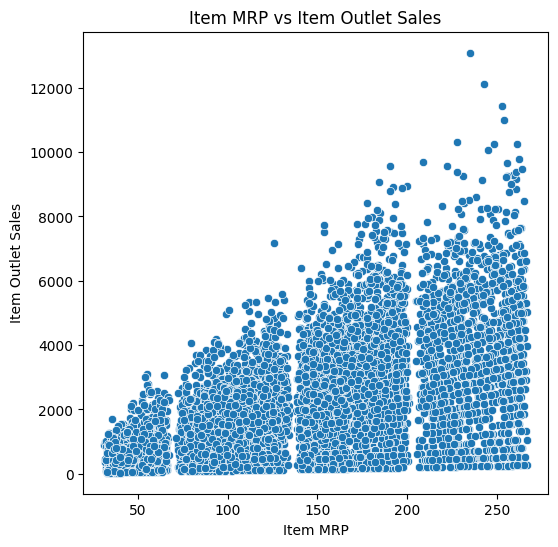

In [13]:

# Analyze the relationship between Item_MRP and Item_Outlet_Sales using a scatter plot
plt.figure(figsize=(6, 6))
sns.scatterplot(x='Item_MRP', y='Item_Outlet_Sales', data=data)
plt.title('Item MRP vs Item Outlet Sales')
plt.xlabel('Item MRP')
plt.ylabel('Item Outlet Sales')
plt.show()

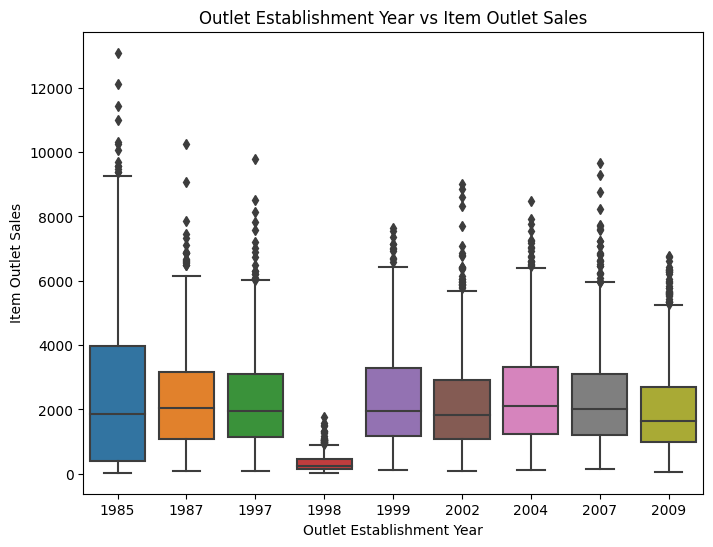

In [14]:
# Analyze the relationship between Outlet_Establishment_Year and Item_Outlet_Sales using a box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Outlet_Establishment_Year', y='Item_Outlet_Sales', data=data)
plt.title('Outlet Establishment Year vs Item Outlet Sales')
plt.xlabel('Outlet Establishment Year')
plt.ylabel('Item Outlet Sales')
plt.show()



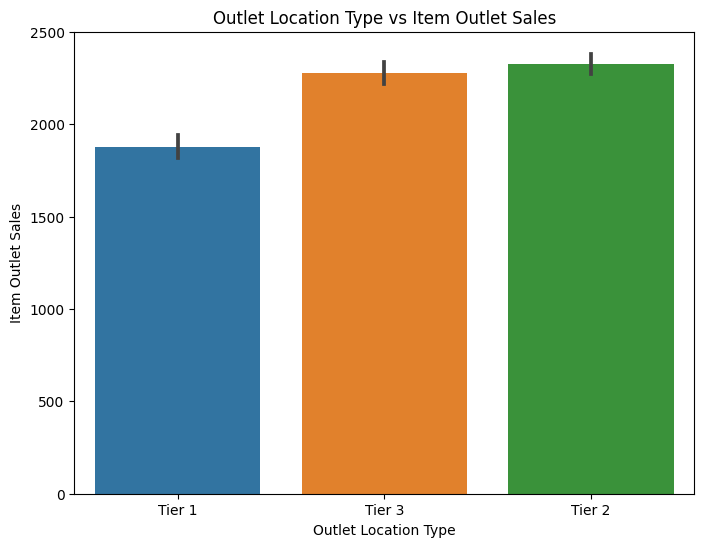

In [15]:
# Analyze the relationship between Outlet_Location_Type and Item_Outlet_Sales using a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', data=data)
plt.title('Outlet Location Type vs Item Outlet Sales')
plt.xlabel('Outlet Location Type')
plt.ylabel('Item Outlet Sales')
plt.show()

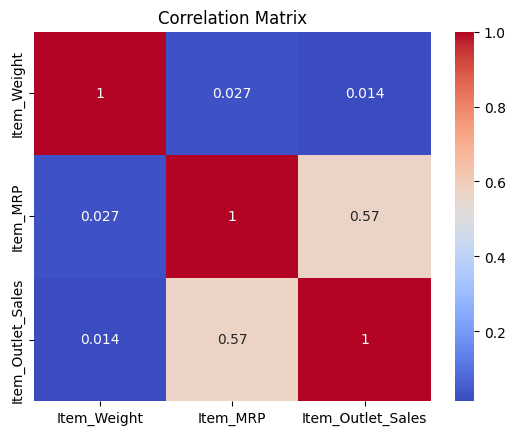

In [16]:
# Analyze correlations between numerical variables using a correlation matrix
numerical_vars = ['Item_Weight', 'Item_MRP', 'Item_Outlet_Sales']
corr_matrix = data[numerical_vars].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [17]:
# Analyze individual variables

# Numerical variables
numerical_vars = ['Item_Weight', 'Item_MRP', 'Item_Outlet_Sales']

In [18]:
# Calculate summary statistics
summary_stats = data[numerical_vars].describe()
print(summary_stats)

       Item_Weight     Item_MRP  Item_Outlet_Sales
count  7060.000000  8523.000000        8523.000000
mean     12.857645   140.992782        2181.288914
std       4.643456    62.275067        1706.499616
min       4.555000    31.290000          33.290000
25%       8.773750    93.826500         834.247400
50%      12.600000   143.012800        1794.331000
75%      16.850000   185.643700        3101.296400
max      21.350000   266.888400       13086.964800


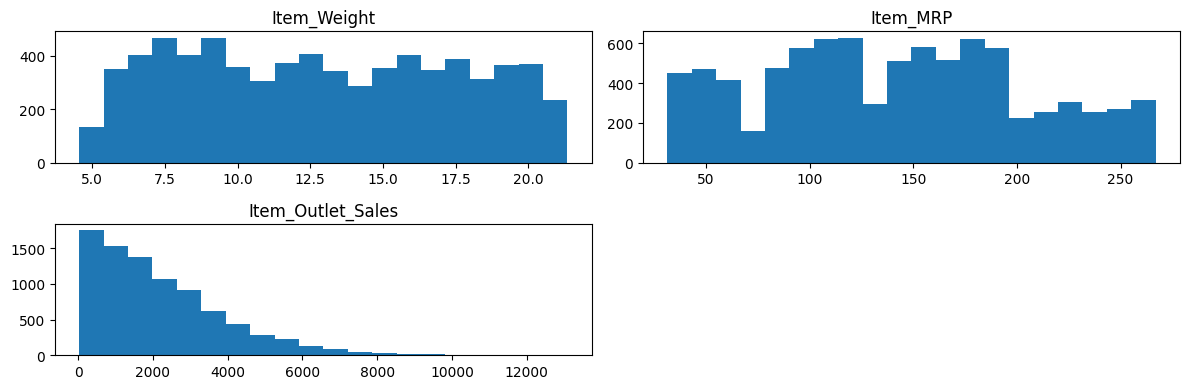

In [19]:
# Plot histograms
data[numerical_vars].hist(bins=20, figsize=(12, 4), grid=False)
plt.tight_layout()
plt.show()

In [20]:
# Categorical variables
categorical_vars = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

In [21]:
# Calculate value counts
for var in categorical_vars:
    value_counts = data[var].value_counts()
    print(f"\n{var}:")
    print(value_counts)


Item_Fat_Content:
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Item_Type:
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

Outlet_Size:
Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

Outlet_Location_Type:
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

Outlet_Type:
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype

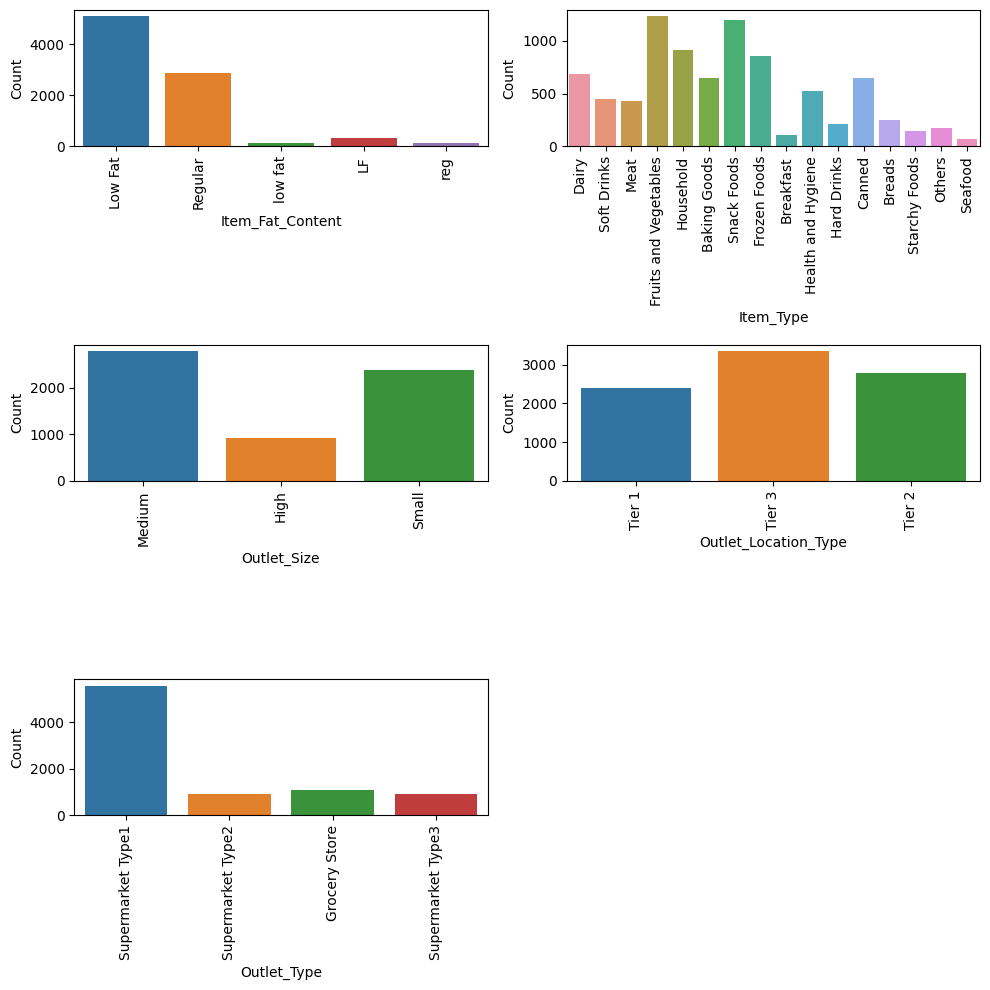

In [22]:
# Plot bar plots
plt.figure(figsize=(10, 10))
for i, var in enumerate(categorical_vars):
    plt.subplot(3, 2, i+1)
    sns.countplot(x=var, data=data)
    plt.xlabel(var)
    plt.xticks(rotation = 90)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()


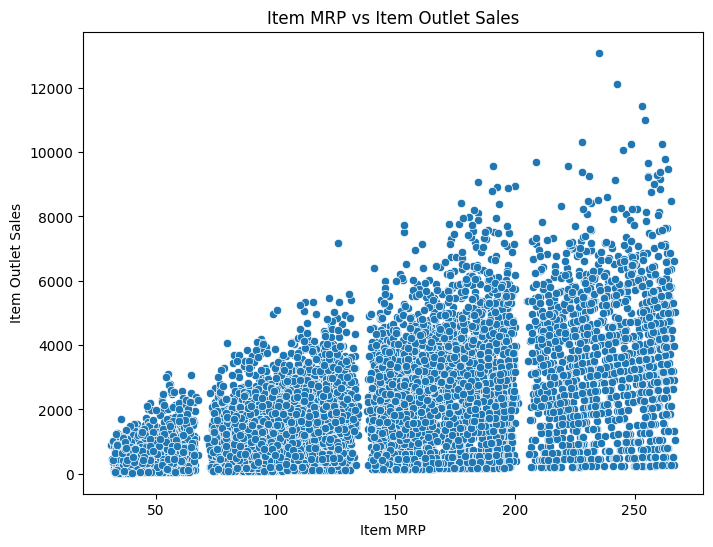

In [23]:
# Bivariate analysis
# Scatter plot: Item_MRP vs Item_Outlet_Sales
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Item_MRP', y='Item_Outlet_Sales', data=data)
plt.title('Item MRP vs Item Outlet Sales')
plt.xlabel('Item MRP')
plt.ylabel('Item Outlet Sales')
plt.show()

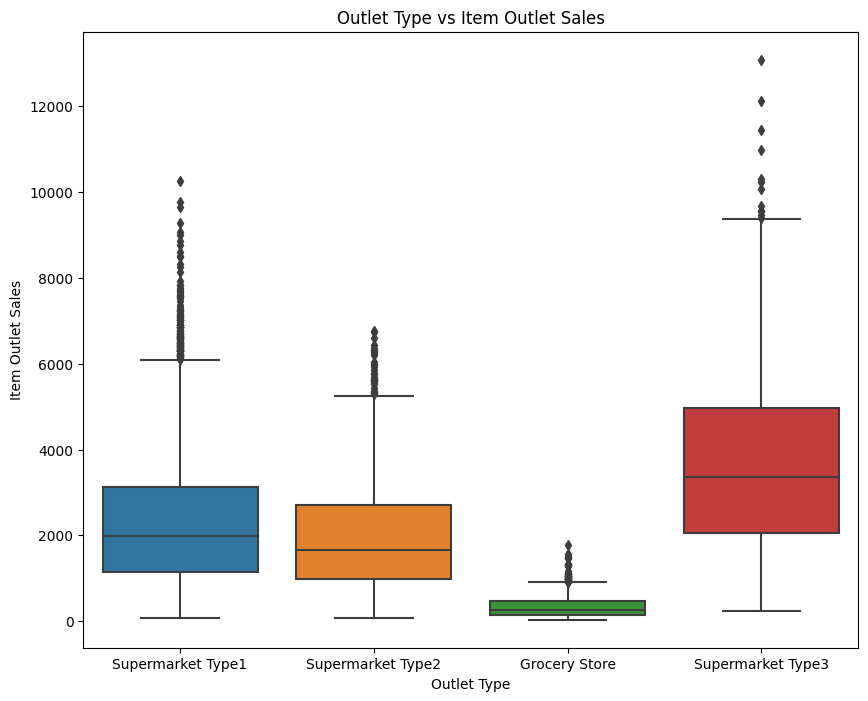

In [24]:
# Box plot: Outlet_Type vs Item_Outlet_Sales
plt.figure(figsize=(10, 8))
sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', data=data)
plt.title('Outlet Type vs Item Outlet Sales')
plt.xlabel('Outlet Type')
plt.ylabel('Item Outlet Sales')
plt.show()

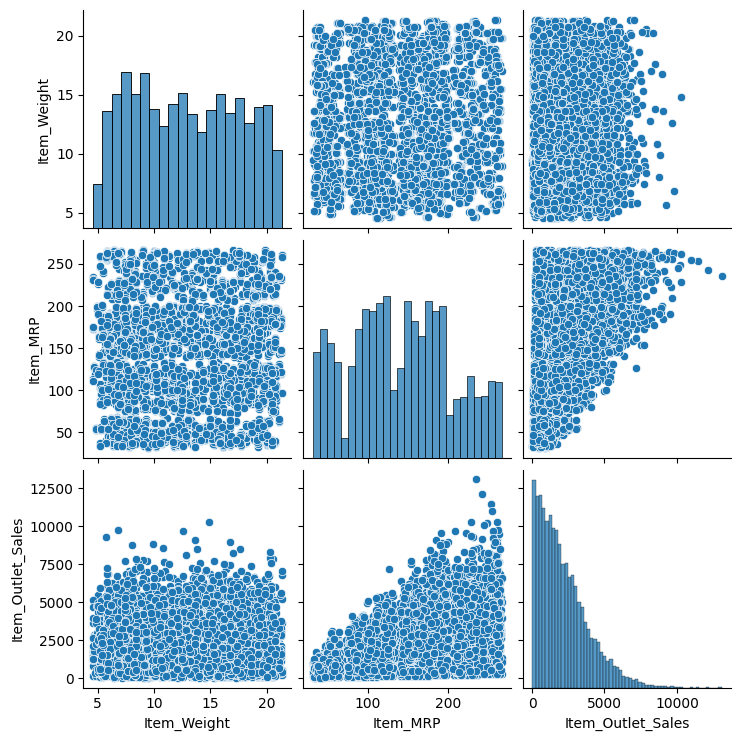

In [25]:
# Pair plot: Item_MRP, Item_Weight, Item_Outlet_Sales
sns.pairplot(data[numerical_vars])
plt.show()

### Feature Engineering

In [26]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
data["Outlet_Type"] = ord_enc.fit_transform(data[["Outlet_Type"]])
data['Outlet_Location_Type'] =ord_enc.fit_transform(data[["Outlet_Location_Type"]])
data['Outlet_Size'] =ord_enc.fit_transform(data[["Outlet_Size"]])
data['Item_Fat_Content'] =ord_enc.fit_transform(data[["Item_Fat_Content"]])
data['Item_Type'] =ord_enc.fit_transform(data[["Item_Type"]])

In [27]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,1.0,0.016047,4.0,249.8092,OUT049,1999,1.0,0.0,1.0,3735.1380
1,DRC01,5.92,2.0,0.019278,14.0,48.2692,OUT018,2009,1.0,2.0,2.0,443.4228
2,FDN15,17.50,1.0,0.016760,10.0,141.6180,OUT049,1999,1.0,0.0,1.0,2097.2700
3,FDX07,19.20,2.0,0.000000,6.0,182.0950,OUT010,1998,NaN,2.0,0.0,732.3800
4,NCD19,8.93,1.0,0.000000,9.0,53.8614,OUT013,1987,0.0,2.0,1.0,994.7052


In [28]:
data.drop(['Item_Identifier', 'Outlet_Identifier'], inplace=True, axis = 1)

In [29]:
data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,1.0,0.016047,4.0,249.8092,1999,1.0,0.0,1.0,3735.1380
1,5.92,2.0,0.019278,14.0,48.2692,2009,1.0,2.0,2.0,443.4228
2,17.50,1.0,0.016760,10.0,141.6180,1999,1.0,0.0,1.0,2097.2700
3,19.20,2.0,0.000000,6.0,182.0950,1998,NaN,2.0,0.0,732.3800
4,8.93,1.0,0.000000,9.0,53.8614,1987,0.0,2.0,1.0,994.7052


## Handling Outliers

<Axes: xlabel='Item_Visibility'>

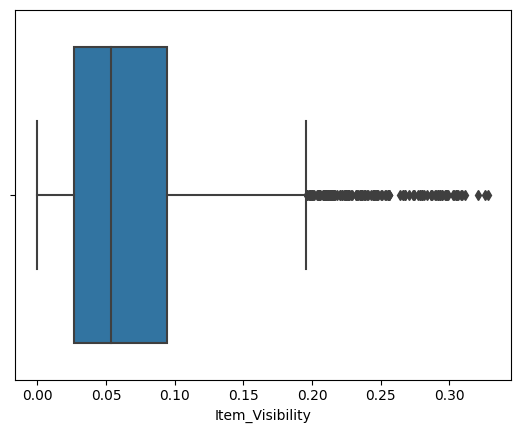

In [30]:
sns.boxplot(x = 'Item_Visibility', data = data)

In [31]:
q1 = data.Item_Visibility.quantile(0.25)
q3 = data.Item_Visibility.quantile(0.75)
ll = q1 - 1.5*(q3 - q1)
ul = q3 + 1.5*(q3 - q1)

In [32]:
def capping(x):
    if x < ll:
        x = ll
        return x
    elif x > ul:
        x = ul
        return x
    else:
        return x

In [33]:
data.Item_Visibility = data.Item_Visibility.apply(capping)

<Axes: xlabel='Item_Visibility'>

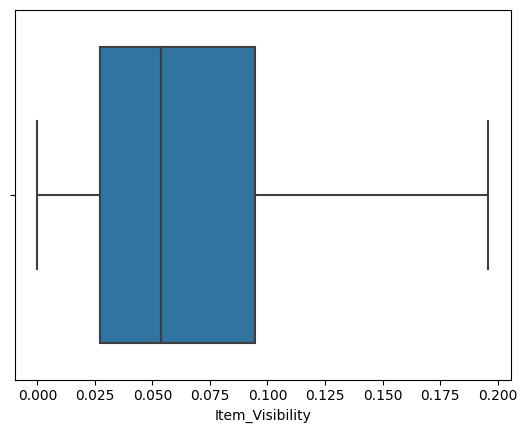

In [34]:
sns.boxplot(x = 'Item_Visibility', data = data)

## Handling Missing Values

In [35]:
data.isna().mean()*100

Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [36]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3)

In [37]:
imputed = imputer.fit_transform(data)

In [38]:
df = pd.DataFrame(imputed, columns = data.columns)
df

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,1.0,0.016047,4.0,249.8092,1999.0,1.0,0.0,1.0,3735.1380
1,5.920,2.0,0.019278,14.0,48.2692,2009.0,1.0,2.0,2.0,443.4228
2,17.500,1.0,0.016760,10.0,141.6180,1999.0,1.0,0.0,1.0,2097.2700
3,19.200,2.0,0.000000,6.0,182.0950,1998.0,2.0,2.0,0.0,732.3800
4,8.930,1.0,0.000000,9.0,53.8614,1987.0,0.0,2.0,1.0,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,1.0,0.056783,13.0,214.5218,1987.0,0.0,2.0,1.0,2778.3834
8519,8.380,2.0,0.046982,0.0,108.1570,2002.0,1.0,1.0,1.0,549.2850
8520,10.600,1.0,0.035186,8.0,85.1224,2004.0,2.0,1.0,1.0,1193.1136
8521,7.210,2.0,0.145221,13.0,103.1332,2009.0,1.0,2.0,2.0,1845.5976


In [39]:
df.isna().mean()*100

Item_Weight                  0.0
Item_Fat_Content             0.0
Item_Visibility              0.0
Item_Type                    0.0
Item_MRP                     0.0
Outlet_Establishment_Year    0.0
Outlet_Size                  0.0
Outlet_Location_Type         0.0
Outlet_Type                  0.0
Item_Outlet_Sales            0.0
dtype: float64

In [40]:
df.Outlet_Size = round(df.Outlet_Size,)

# ML Model Building

### Data Splitting

In [41]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,1.0,0.016047,4.0,249.8092,1999.0,1.0,0.0,1.0,3735.1380
1,5.92,2.0,0.019278,14.0,48.2692,2009.0,1.0,2.0,2.0,443.4228
2,17.50,1.0,0.016760,10.0,141.6180,1999.0,1.0,0.0,1.0,2097.2700
3,19.20,2.0,0.000000,6.0,182.0950,1998.0,2.0,2.0,0.0,732.3800
4,8.93,1.0,0.000000,9.0,53.8614,1987.0,0.0,2.0,1.0,994.7052


In [42]:
X = df.iloc[:,:-1]
y = df.Item_Outlet_Sales

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [44]:
print(f'Samples of trainind data = {X_train.shape[0]}')
print(f'Samples of testing data = {X_test.shape[0]}')

Samples of trainind data = 6818
Samples of testing data = 1705


In [45]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

## Linear Regression

In [46]:
reg= LinearRegression()
reg

LinearRegression()

In [47]:
reg_model = reg.fit(X_train, y_train)
reg_model

LinearRegression()

In [48]:
lr_pred = reg.predict(X_test)
lr_pred

array([1098.21220893,  661.63283816,  973.55744575, ...,  524.12404901,
       1222.132768  , 1389.0118665 ])

In [49]:
Mean_Squared_Error=mean_squared_error(y_test,lr_pred)
Mean_Squared_Error


1296417.9440642563

In [50]:
Mean_Absolute_Error=mean_absolute_error(y_test,lr_pred)
Mean_Absolute_Error

857.812048009006

In [51]:
R_squared_value=r2_score(y_test,lr_pred)
R_squared_value

0.5230197859838784

In [52]:
Root_Mean_Squared_Error = np.sqrt(Mean_Squared_Error)
Root_Mean_Squared_Error

1138.6035060828929

## Random Forest Regressor

In [53]:
rfr = RandomForestRegressor(max_depth=6, random_state=0)
rfr

RandomForestRegressor(max_depth=6, random_state=0)

In [54]:
rfr_model = rfr.fit(X_train, y_train)
rfr_model

RandomForestRegressor(max_depth=6, random_state=0)

In [55]:
rfr_model_pred = rfr_model.predict(X_test)
rfr_model_pred

array([1233.41785781,  672.25717385,  665.58894452, ...,  665.58894452,
        743.92815447, 1658.6350883 ])

In [56]:
Mean_Squared_Error=mean_squared_error(y_test,rfr_model_pred)
Mean_Squared_Error

1040891.0128926437

In [57]:
Mean_Absolute_Error=mean_absolute_error(y_test,rfr_model_pred)
Mean_Absolute_Error

711.5250204428983

In [58]:
R_squared_value=r2_score(y_test,rfr_model_pred)
R_squared_value

0.6170336731528743

In [59]:
Root_Mean_Squared_Error = np.sqrt(Mean_Squared_Error)
Root_Mean_Squared_Error

1020.2406642026398

## XGBoost Regressor

In [60]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(random_state=0)
gbr

GradientBoostingRegressor(random_state=0)

In [61]:
gbr_model = gbr.fit(X_train, y_train)
gbr_model

GradientBoostingRegressor(random_state=0)

In [62]:
gbr_model_pred = gbr_model.predict(X_test)
gbr_model_pred

array([1281.57125625,  697.73750143,  679.2319244 , ...,  679.2319244 ,
        631.189585  , 1605.80134828])

In [63]:
Mean_Squared_Error=mean_squared_error(y_test,gbr_model_pred)
Mean_Squared_Error

1062817.7953619533

In [64]:
Mean_Absolute_Error=mean_absolute_error(y_test,gbr_model_pred)
Mean_Absolute_Error

721.1821851870911

In [65]:
R_squared_value=r2_score(y_test,gbr_model_pred)
R_squared_value

0.6089663354221819

In [66]:
Root_Mean_Squared_Error = np.sqrt(Mean_Squared_Error)
Root_Mean_Squared_Error

1030.9305482727502